 Import the required libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


Load and explore the dataset

In [3]:
data = pd.read_csv("/content/Fraud.csv")

In [4]:
print(data.head())

   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0      0.0             0.0  
1  M2044282225             0.0             0.0      0.0             0.0  
2   C553264065             0.0             0.0      1.0             0.0  
3    C38997010         21182.0             0.0      1.0             0.0  
4  M1230701703             0.0             0.0      0.0             0.0  


In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151799 entries, 0 to 151798
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            151799 non-null  int64  
 1   type            151799 non-null  object 
 2   amount          151799 non-null  float64
 3   nameOrig        151799 non-null  object 
 4   oldbalanceOrg   151799 non-null  float64
 5   newbalanceOrig  151798 non-null  float64
 6   nameDest        151798 non-null  object 
 7   oldbalanceDest  151798 non-null  float64
 8   newbalanceDest  151798 non-null  float64
 9   isFraud         151798 non-null  float64
 10  isFlaggedFraud  151798 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 12.7+ MB
None


In [6]:
print(data.describe())

                step        amount  oldbalanceOrg  newbalanceOrig  \
count  151799.000000  1.517990e+05   1.517990e+05    1.517980e+05   
mean        9.333902  1.791774e+05   8.879109e+05    9.043402e+05   
std         1.906281  3.401606e+05   2.807531e+06    2.844268e+06   
min         1.000000  3.200000e-01   0.000000e+00    0.000000e+00   
25%         9.000000  1.111398e+04   0.000000e+00    0.000000e+00   
50%        10.000000  6.122687e+04   1.999000e+04    0.000000e+00   
75%        11.000000  2.230398e+05   1.956685e+05    2.262719e+05   
max        12.000000  1.000000e+07   3.893942e+07    3.894623e+07   

       oldbalanceDest  newbalanceDest        isFraud  isFlaggedFraud  
count    1.517980e+05    1.517980e+05  151798.000000        151798.0  
mean     9.137641e+05    1.180076e+06       0.000863             0.0  
std      2.384389e+06    2.705635e+06       0.029364             0.0  
min      0.000000e+00    0.000000e+00       0.000000             0.0  
25%      0.000000e+00  

Data Preprocessing

In [7]:
# Drop irrelevant columns (if any)
data = data.drop(['nameOrig', 'nameDest'], axis=1)

In [8]:
# Check for any missing values and handle them (if needed)
print(data.isnull().sum())

step              0
type              0
amount            0
oldbalanceOrg     0
newbalanceOrig    1
oldbalanceDest    1
newbalanceDest    1
isFraud           1
isFlaggedFraud    1
dtype: int64


In [9]:
data.dropna(inplace=True)

In [10]:
# Convert 'type' column to numerical using one-hot encoding
data = pd.get_dummies(data, columns=['type'], drop_first=True)

In [11]:
# Separate the features and target variable
X = data.drop(['isFraud'], axis=1)
y = data['isFraud']

In [12]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Scale the features for better performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Model Building with help of Random Forest

In [17]:
# Initialize the model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


[[30341     2]
 [    8     9]]

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     30343
         1.0       0.82      0.53      0.64        17

    accuracy                           1.00     30360
   macro avg       0.91      0.76      0.82     30360
weighted avg       1.00      1.00      1.00     30360



Build and Train the Decision Tree Model

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree

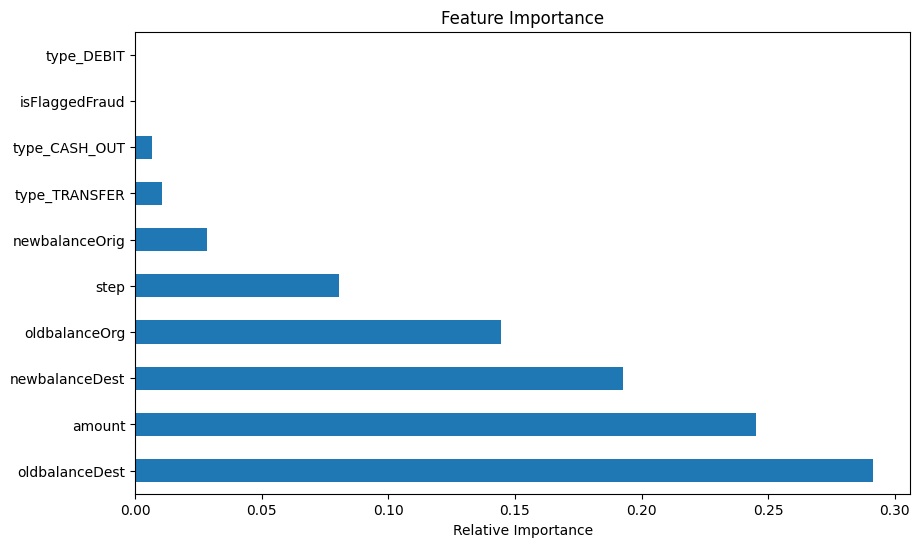

In [43]:
# Feature importance plot
plt.figure(figsize=(10, 6))
importance = pd.Series(dt_model.feature_importances_, index=X.columns)
importance.nlargest(10).plot(kind='barh')
plt.title('Feature Importance')
plt.xlabel('Relative Importance')
plt.show()

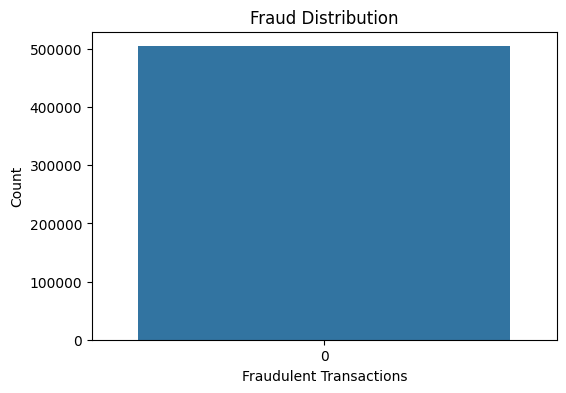

In [44]:
# Fraud distribution
plt.figure(figsize=(6, 4))
sns.countplot(data['isFraud'])
plt.title('Fraud Distribution')
plt.xlabel('Fraudulent Transactions')
plt.ylabel('Count')
plt.show()


In [18]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

 Make Predictions

In [19]:
# Make predictions on the test set
y_pred = dt_model.predict(X_test)


Evaluate the Model

In [20]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print(classification_report(y_test, y_pred))

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.9991106719367588
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     30343
         1.0       0.34      0.65      0.45        17

    accuracy                           1.00     30360
   macro avg       0.67      0.82      0.72     30360
weighted avg       1.00      1.00      1.00     30360

Confusion Matrix:
[[30322    21]
 [    6    11]]


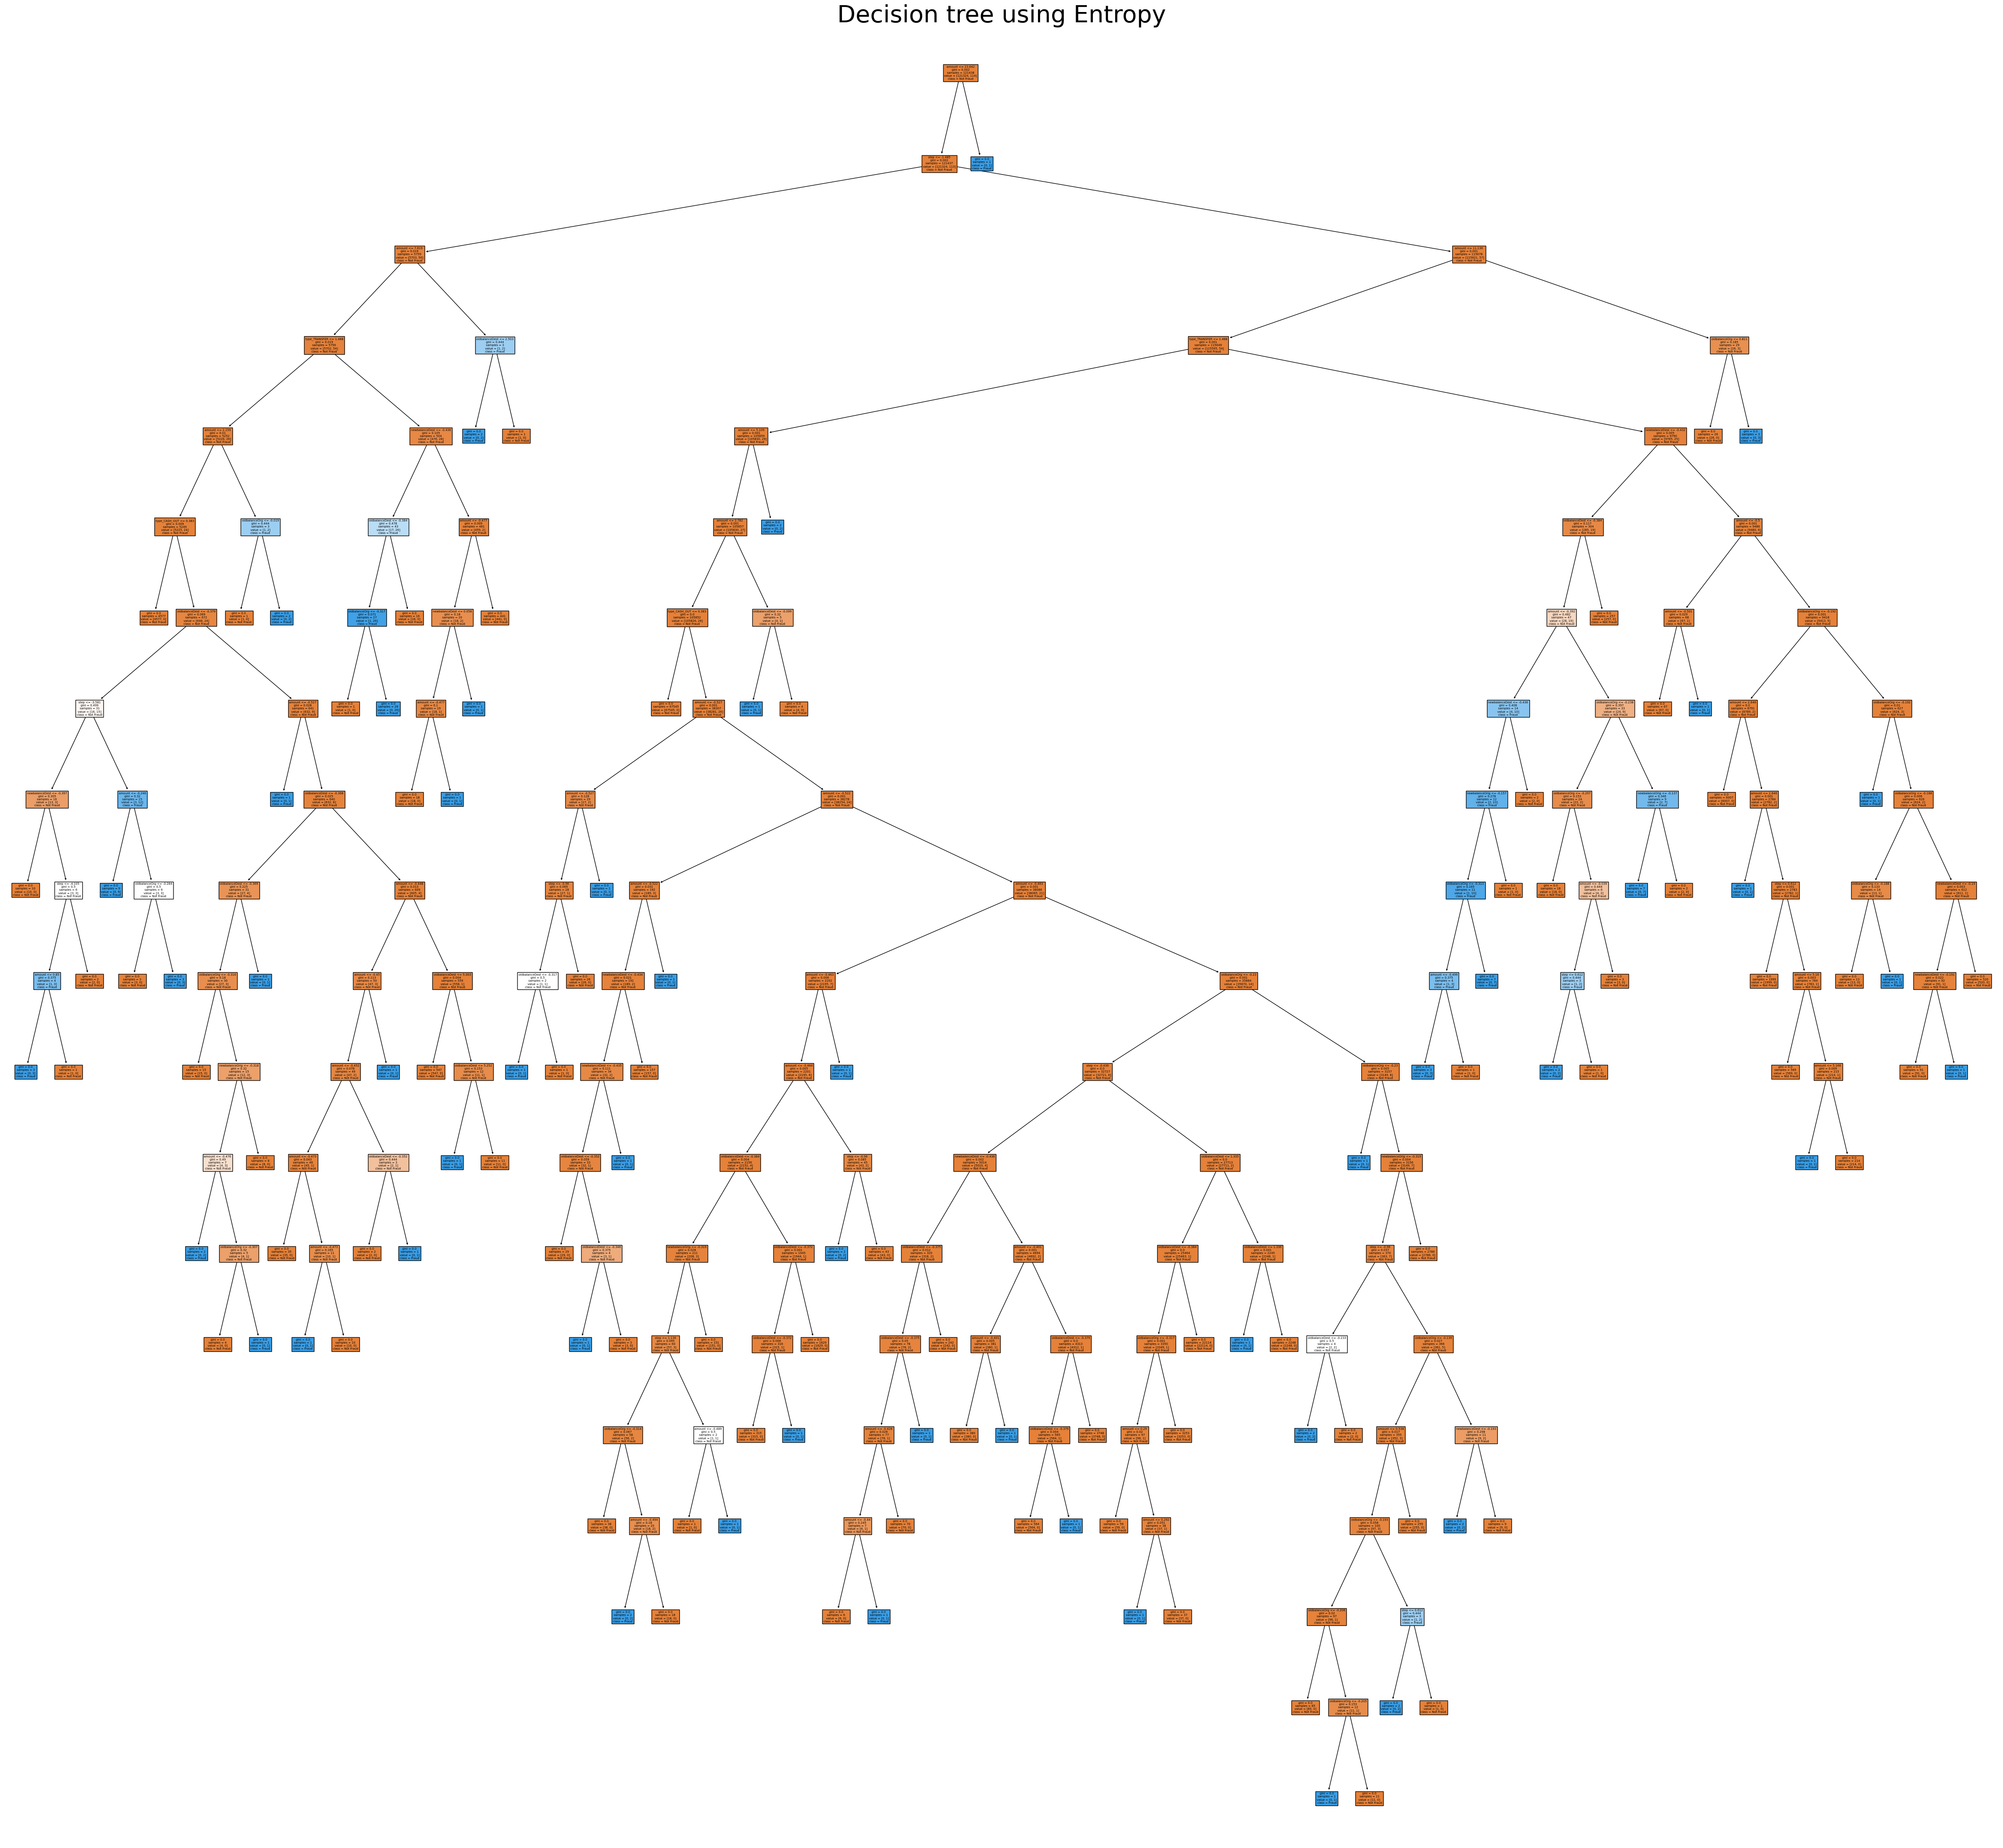

In [40]:
fig = plt.figure(figsize=(60, 55))
tree.plot_tree(dt_model, feature_names=X.columns, class_names=['Not Fraud', 'Fraud'], filled=True)
plt.title('Decision tree using Entropy', fontsize=40)
plt.show()